## Data Analysis of Itolizuma drug in Covid cases<a id='main'>

## Contents<a id='Contents'></a>
* [Data Analysis of Itolizuma drug in Covid cases](#main)
  * [Contents](#Contents)
    * [Import Libraries](#imports)
    * [Load Data](#load_data)
    * [Baseline Characetristics and demographics](#baseline_characteristics_demographics)
    * [Mode of Oxygen delivery at admission](#oxygen_status)
    * [Biochemical Parameter Subplots](#subplots)
                 
  * [Discussion](#discussion)
  * [Conclusion](#conclusion)

### Import Libraries<a id='imports'>

In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import pandas as pd
#
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
#

print("Loaded Libraries")
import warnings
warnings.filterwarnings('ignore')

Loaded Libraries


### Load Data<a id='load_data'>

In [2]:
df_xls = pd.read_excel('ito_covid_data_v_1.xlsx', index_col=0)  

In [3]:
df_xls.head()

,admission_date,patient_num,age_yrs,weight_kg,gender,fever,cough,sob,weakness,appetite_loss,...,lymphocyte_cnt_at_discharge,platelets_pre_ito_1,platelets_pre_ito_2,platelets_pre_ito_worst,platelets_post_ito_1,platelets_post_ito_2,platelets_at_discharge,discharge_date,hospital_duration,is_dead
s_no,,,,,,,,,,,,,,,,,,,,,
1,2021-01-07,P1,58,75.0,M,NaN,NaN,Y,Y,NaN,...,10800.0,2.9,3.6,2.9,4.0,4.1,4.2,2021-01-27,20,N
2,2021-01-07,P2,84,76.0,M,NaN,NaN,Y - GRADE 4,Y,NaN,...,14000.0,2.6,2.1,2.1,3.3,3.3,3.3,2021-01-25,18,N
3,2021-01-14,P3,53,75.0,M,NaN,Y,Y - GRADE 4,NaN,NaN,...,5800.0,2.8,2.6,2.6,1.8,1.8,2.8,2021-02-08,25,N
4,2021-01-09,P4,69,95.0,M,NaN,Y,Y - GRADE 4,NaN,NaN,...,13000.0,3.7,NaN,3.7,3.3,3.3,3.3,2021-01-23,14,N
5,2020-11-20,P5,77,65.0,M,NaN,NaN,Y - GRADE 4,Y,NaN,...,30100.0,1.9,2.0,1.9,1.9,1.6,6.0,2020-12-10,20,Y


In [4]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 13
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   admission_date                   13 non-null     datetime64[ns]
 1   patient_num                      13 non-null     object        
 2   age_yrs                          13 non-null     int64         
 3   weight_kg                        10 non-null     float64       
 4   gender                           13 non-null     object        
 5   fever                            4 non-null      object        
 6   cough                            7 non-null      object        
 7   sob                              13 non-null     object        
 8   weakness                         7 non-null      object        
 9   appetite_loss                    2 non-null      object        
 10  other_symptoms                   4 non-null      object        


In [5]:
df_xls.rename(columns = {'SPO2_pre_ito_worst':'SPO2_pre_ito', 'SPO2_post_ito_best':'SPO2_post_ito',
                              'FiO2_pre_ito_worst':'FiO2_pre_ito','FiO2_post_ito_best':'FiO2_post_ito',
                        'crp_mg_dl_pre_ito_worst': 'crp_mg_dl_pre_ito', 'crp_mg_dl_at_discharge': 'crp_mg_dl_ppst_ito',
                      'd_dimer_ng_ltr_pre_ito_worst':'d_dimer_ng_ltr_pre_ito', 'd_dimer_ng_ltr_at_discharge': 'd_dimer_ng_ltr',
                    's_ferritin_mg_ltr_pre_ito_worst':'s_ferritin_mg_ltr_pre_ito', 's_ferritin_mg_ltr_at_discharge': 's_ferritin_mg_ltr_post_ito',
                    'lymphocyte_cnt_pre_ito_worst': 'lymphocyte_cnt_pre_ito','lymphocyte_cnt_post_ito_best': 'lymphocyte_cnt_post_ito',
                    'platelets_pre_ito_worst':'platelets_pre_ito', 'platelets_at_discharge':'platelets_post_ito'   
                
                        }, inplace = True)
   

### Replacing Y(Nasal 15 ltr oxygen) oxygen_status_at_admission label to Y (Nasal)

In [6]:
labels = df_xls['oxygen_status_at_admission'].value_counts().index
labels

Index(['(Y)NIV Helmet ', 'Y', 'Y (NRBM)', 'Y (Nasal)',
       'Y(Nasal 15 ltr oxygen)'],
      dtype='object')

In [7]:
df_xls['oxygen_status_at_admission'].loc[(df_xls['oxygen_status_at_admission'] == 'Y(Nasal 15 ltr oxygen)')] = 'Y (Nasal)'

In [8]:
labels = df_xls['oxygen_status_at_admission'].value_counts().index
labels

Index(['(Y)NIV Helmet ', 'Y', 'Y (Nasal)', 'Y (NRBM)'], dtype='object')

In [9]:
df_xls.rename(columns = {'oxygen_status at_admission':'oxygen_status_at_admission'}, inplace = True)

In [10]:
df_xls.shape

(13, 79)

In [11]:
df_xls.loc[(df_xls['diabetes_mellitus'] == 'Y') & (df_xls['hypertension'] == 'Y'),['patient_num','diabetes_mellitus','hypertension']]

,patient_num,diabetes_mellitus,hypertension
s_no,,,
1,P1,Y,Y
3,P3,Y,Y
4,P4,Y,Y
5,P5,Y,Y
7,P7,Y,Y
8,P8,Y,Y
9,P9,Y,Y
10,P10,Y,Y


In [12]:
df_xls.loc[(df_xls['diabetes_mellitus'] != 'Y') & (df_xls['hypertension'] != 'Y') & (df_xls['other_comorbidity'] != 'Y')]

,admission_date,patient_num,age_yrs,weight_kg,gender,fever,cough,sob,weakness,appetite_loss,...,lymphocyte_cnt_at_discharge,platelets_pre_ito_1,platelets_pre_ito_2,platelets_pre_ito,platelets_post_ito_1,platelets_post_ito_2,platelets_post_ito,discharge_date,hospital_duration,is_dead
s_no,,,,,,,,,,,,,,,,,,,,,
6,2020-11-25,P6,68,72.0,M,NaN,NaN,Y - GRADE 4,NaN,NaN,...,15900.0,2.4,3.3,2.4,3.3,1.2,0.9,2020-12-10,15,N
11,2021-03-15,P11,78,NaN,M,Y,NaN,Y,Y,Y,...,9920.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-03,19,N
12,2021-03-19,P12,54,NaN,M,Y,Y,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-14,26,N
13,2021-04-07,P13,36,NaN,M,Y,Y,Y,Y,Y,...,7670.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-20,13,N


In [13]:
(1/13)

0.07692307692307693

### Baseline Characetristics and demographics<a id='baseline_characteristics_demographics'>

<table>
    <caption><strong>Baseline Characetristics and demographics</strong></caption>
    <tr><th>&nbsp;</th><th>Variable(number/value)</th><th>Percentage</th></tr>
<tr><td>Total Number of patients</td><td>13</td><td>100</td></tr>
<tr><th>Age in years</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>66.7<span>&#177;</span> 13</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) years</td><td>36 - 84</td><td>&nbsp;</td></tr>
<tr><th>Gender</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Male</td><td>11</td><td>85</td></tr>
<tr><td>Female</td><td>2</td><td>15</td></tr>
<tr><th>Weight in Kgs</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>10</td><td>77</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>74<span>&#177;</span>11</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) kgs</td><td>52 - 95</td><td>&nbsp;</td></tr>
<tr><th>Symptoms and Comorbidities</th><th colspan="2">&nbsp;</th></tr>
<tr><th>Symptoms</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Fever</td><td>4</td><td>31</td></tr>
<tr><td>Cough</td><td>7</td><td>54</td></tr>
<tr><td>Weakness</td><td>7</td><td>54</td></tr>
<tr><td>Appetite Loss</td><td>2</td><td>15</td></tr>
<tr><td>Shortness of breath</td><td>13</td><td>100</td></tr>
<!-- <tr><td>Y</td><td>6</td><td>46</td></tr>
 <tr><td>Y- GRADE 4</td><td>7</td><td>54</td></tr> -->
<tr><th>Other Symptoms</th><th>4</th><th>31</th></tr>
<tr><td>Body pain </td><td>1</td><td>8</td></tr>
<tr><td>Myalgia</td><td>1</td><td>8</td></tr>
<tr><td>Myalgia high grade fever with chills</td><td>1</td><td>8</td></tr>
<tr><td>High grade fever</td><td>1</td><td>8</td></tr>
    <tr><th>Comorbidities</th><th>9</th><th>69</th></tr>
    <tr><td>Diabetes Melitus and Hypertension</td><td>8</td><td>62</td></tr>
    <tr><td>Other Comorbidities</td><td>1</td><td>7</td></tr>
</table>

### Mode of Oxygen delivery at admission<a id='oxygen_status'>

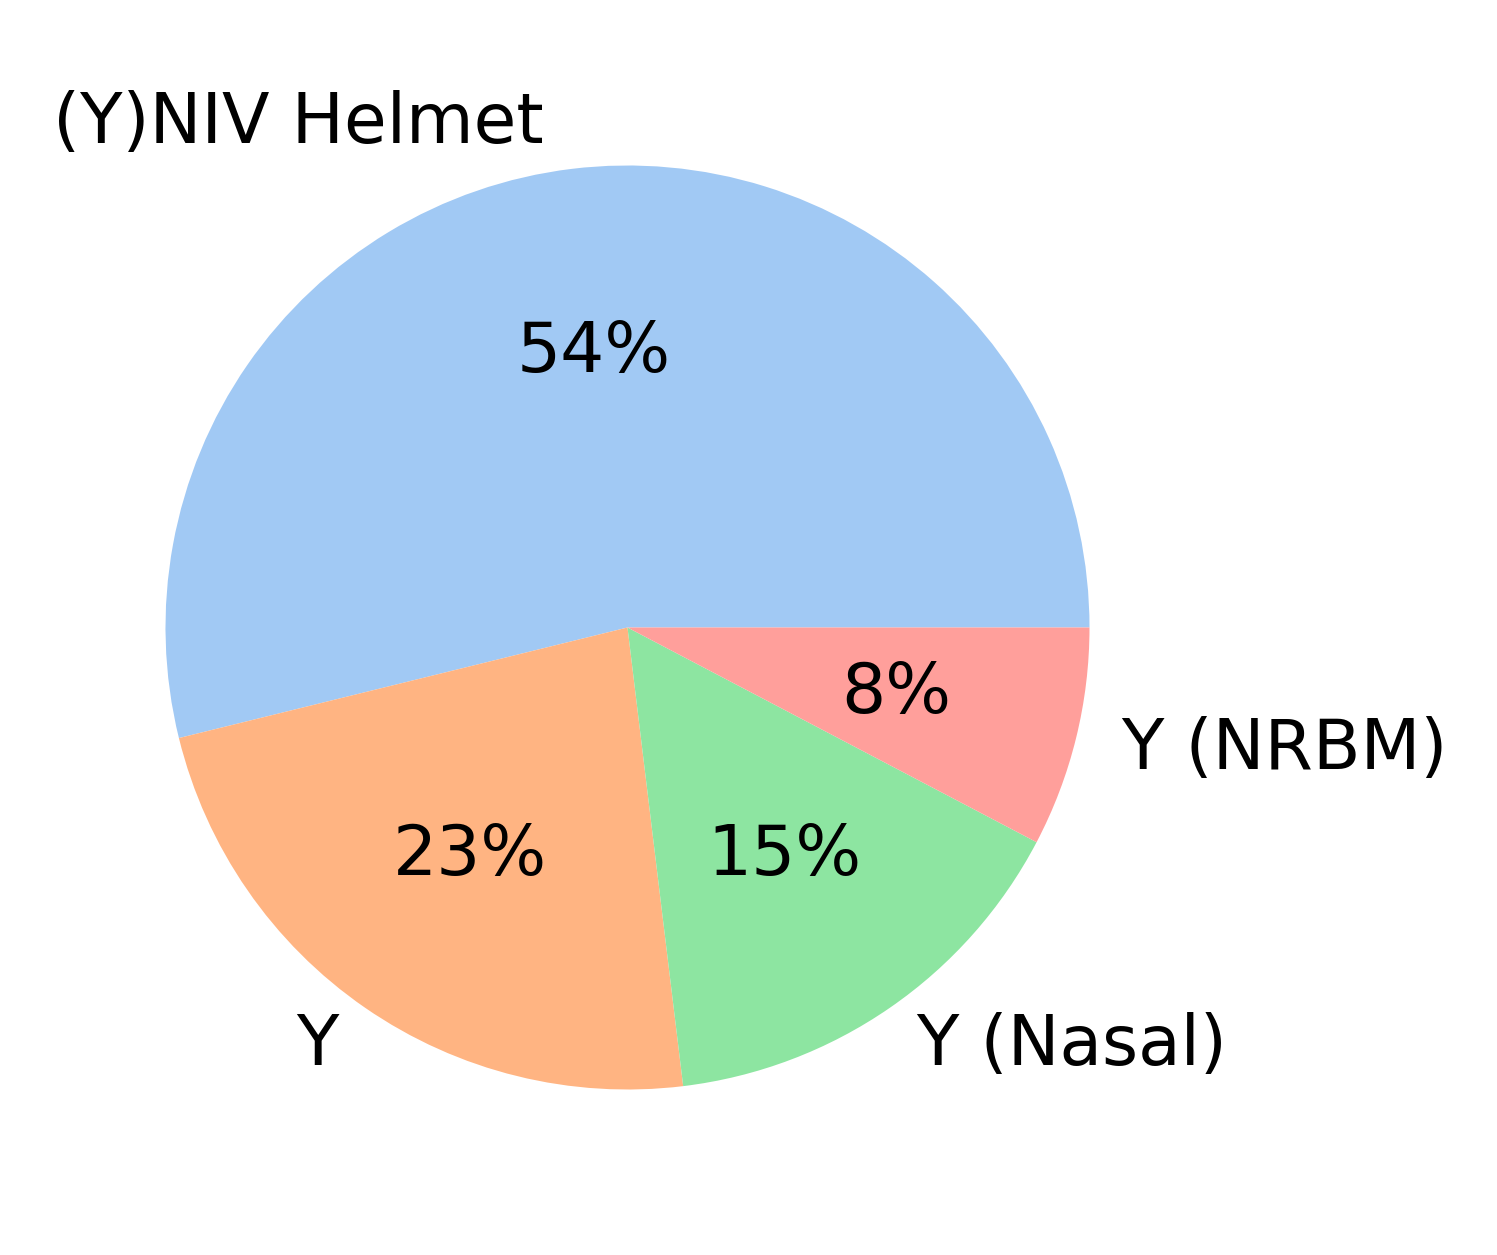

<Figure size 640x480 with 0 Axes>

In [14]:
#define data
data =df_xls['oxygen_status_at_admission'].value_counts()
labels = df_xls['oxygen_status_at_admission'].value_counts().index
plt.figure(figsize=(4,3), dpi=500)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig('pie_oxygen.png')

### Biochemical Parameter Subplots<a id='subplots'>

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("SPO2", "Ferritin", "Lymphocytes", "Platelets"))
df= pd.DataFrame(data=df_xls, columns=["SPO2_pre_ito", "SPO2_post_ito"])
df=df.rename(columns={"SPO2_pre_ito": "Pre_Ito", "SPO2_post_ito": "Post_Ito"})
df=pd.melt(df)
fig.add_trace(
    go.Box(x=df.variable, y=df.value), row = 1, col = 1)
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default


df_ferritin = pd.DataFrame(data=df_xls, columns=["s_ferritin_mg_ltr_pre_ito", "s_ferritin_mg_ltr_post_ito"])
df_ferritin=df_ferritin.rename(columns={"s_ferritin_mg_ltr_pre_ito": "Pre_Ito", "s_ferritin_mg_ltr_post_ito": "Post_Ito"})
df_ferritin=pd.melt(df_ferritin)
fig.add_trace(
    go.Box(x=df_ferritin.variable, y=df_ferritin.value), row = 1, col = 2)
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

df_lymphocytes = pd.DataFrame(data=df_xls, columns=["lymphocyte_cnt_pre_ito",  "lymphocyte_cnt_post_ito"])
df_lymphocytes=df_lymphocytes.rename(columns={"lymphocyte_cnt_pre_ito": "Pre_Ito", "lymphocyte_cnt_post_ito": "Post_Ito"})
df_lymphocytes=pd.melt(df_lymphocytes)
fig.add_trace(
    go.Box(x=df_lymphocytes.variable, y=df_lymphocytes.value), row = 2, col = 1)

df_platelets = pd.DataFrame(data=df_xls, columns=["platelets_pre_ito",  "platelets_post_ito"])
df_platelets=df_platelets.rename(columns={"platelets_pre_ito": "Pre_Ito", "platelets_post_ito": "Post_Ito"})
df_platelets=pd.melt(df_platelets)
fig.add_trace(
    go.Box(x=df_platelets.variable, y=df_platelets.value), row = 2, col = 2)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(height=800, width=800, title_text="Biochemical parameter Subplots")
fig.show()


### Discussion<a id='discussion'>

In [22]:
### details needed

### Conclusion<a id='conclusion'>

In [23]:
### details needed